In [3]:
import matplotlib.pyplot as plt  # for ploting the graph
import scipy.io # for ploting the graph
import numpy as np  #for calculation
import pandas as pd # for making dataframe 
import os#for import

In [4]:
#path of the file 
path=r'D:\ml_datasets\bearing\2nd_test\2nd_test'

In [5]:
filename = '2004.02.12.10.32.39' #path of 1st dataset
#read the csv file at directory joing path and file seprated by \ 
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None) 
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


In [6]:
#name of the dataset
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


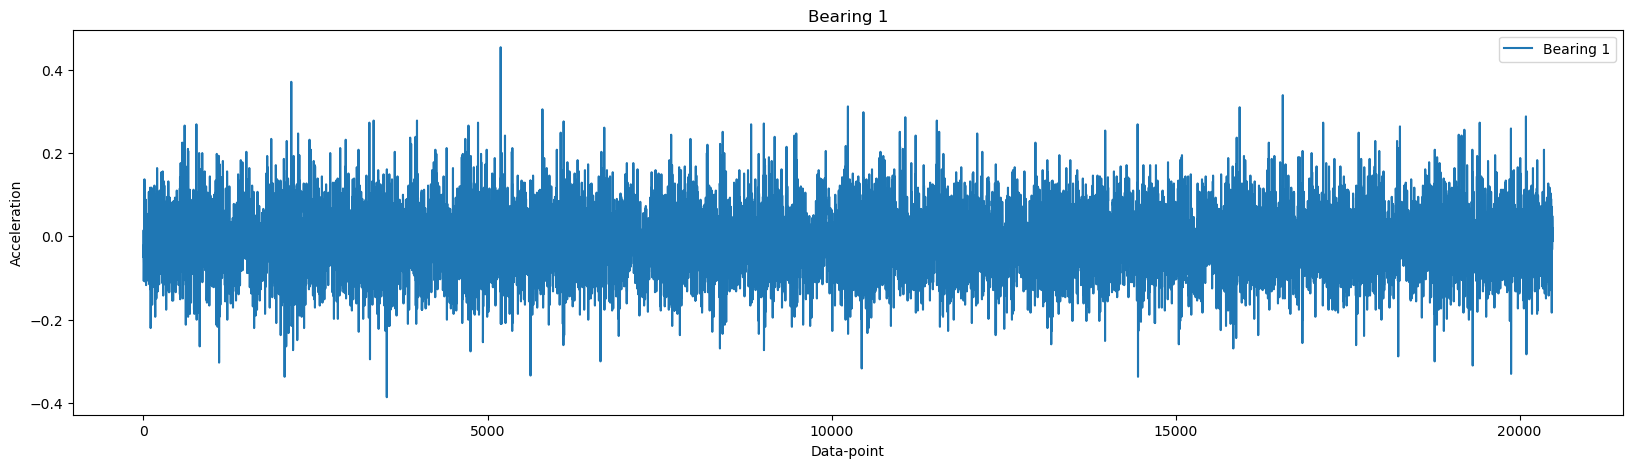

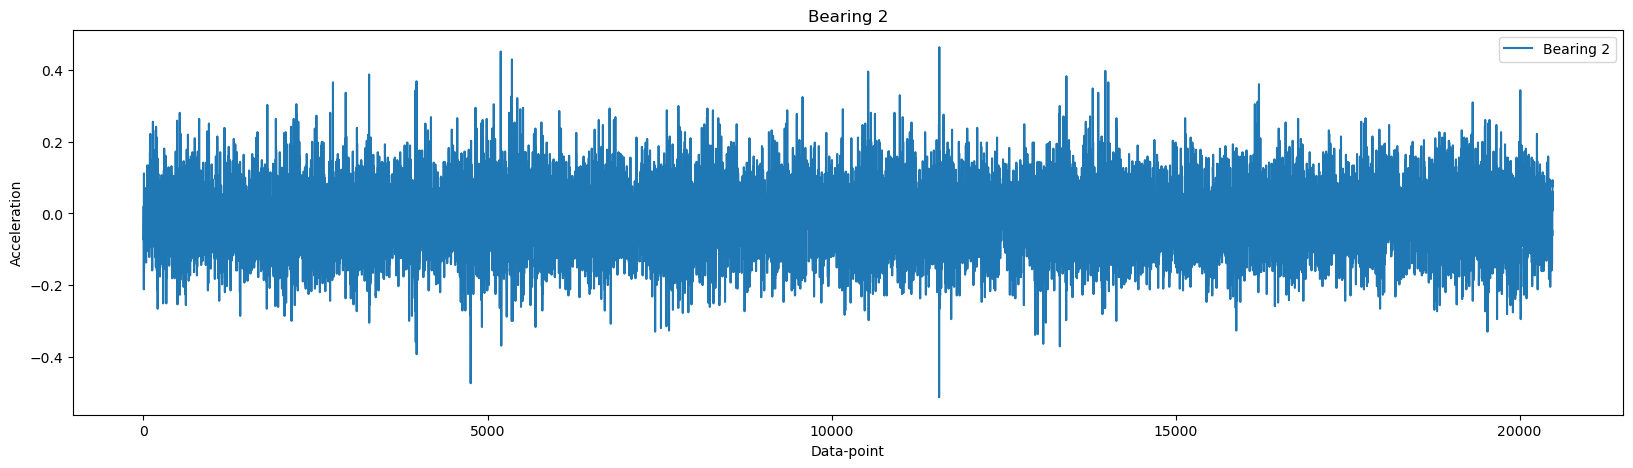

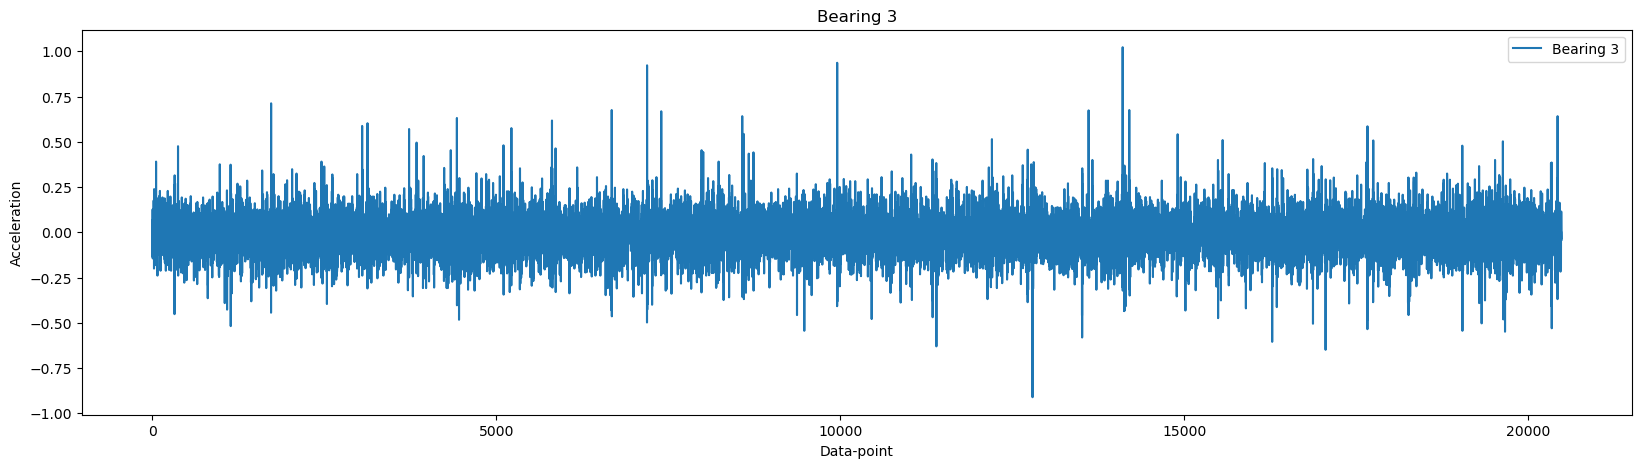

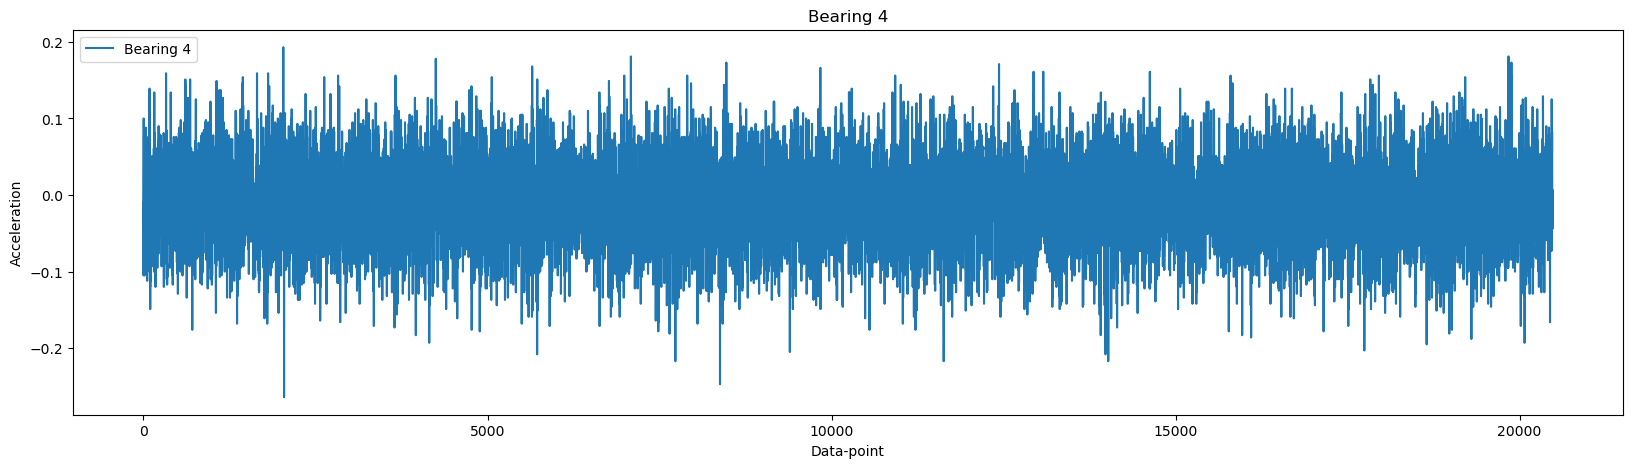

In [7]:
for i in [0,1,2,3]:
#.iloc extract data from the DataFrame 'dataset'.
#: all rows
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()


In [8]:
bearing_no=1
#bearing_no-1 this colume
#np.array convert it to the numpy array
bearing_data = np.array(dataset.iloc[:,bearing_no-1])
bearing_data


array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [9]:
temp = bearing_data
temp

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [10]:
#np.zeros((1, 9)): This function creates a NumPy array (matrix) filled with zeros.
#The argument (1, 9) specifies the shape of the array. In this case, it's a 1x9 matrix, meaning one row and nine columns.
feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:

def compute_skewness(x): 
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [12]:
def compute_kurtosis(x): 
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [13]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
feature_matrix

array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669]])

In [14]:
df = pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]
df

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307


In [15]:
#forming the dataframe for bearing 1 in test 2
#in such way we have to calculate for all other 3 bearings in test 2
#in short in this code we are appending all the datasets to in 1 dataframe or in 1 matrix
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\2nd_test\2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
    
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004.02.12.10.42,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004.02.12.10.52,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004.02.12.11.02,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004.02.12.11.12,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004.02.19.05.52,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004.02.19.06.02,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004.02.19.06.12,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [16]:
#assigning the coloum names 
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
#changing the format to year, month ,day, hour , min
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')
# sort the rows according to the date
Time_feature_matrix = Time_feature_matrix.sort_index()
# assign the name to each files according to its bearing number and test case , this files will get save in csv, u can see it
Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [17]:
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv")
df1 = pd.read_csv("Time_feature_matrix_Bearing_1_Test_2.csv",index_col='Unnamed: 0')#'Unnamed: 0': colume ko index karo so we can acces it easily
df1.index = pd.to_datetime(df1.index)# converting the index to datetimeformat
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [18]:
##forming the dataframe for bearing 2 in test 2
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=2 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\2nd_test\2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
    
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773
2004.02.12.10.42,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,-36.478394
2004.02.12.10.52,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,-55.275827
2004.02.12.11.02,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,-38.844130
2004.02.12.11.12,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,-61.158395
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,-260.558973
2004.02.19.05.52,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,-187.799539
2004.02.19.06.02,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,-118.636161
2004.02.19.06.12,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,1.076734


In [19]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773
2004-02-12 10:42:00,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,-36.478394
2004-02-12 10:52:00,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,-55.275827
2004-02-12 11:02:00,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,-38.844130
2004-02-12 11:12:00,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,-61.158395
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,-260.558973
2004-02-19 05:52:00,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,-187.799539
2004-02-19 06:02:00,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,-118.636161
2004-02-19 06:12:00,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,1.076734


In [20]:
#forming the dataframe for bearing 3 in test 2
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=3 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\2nd_test\2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
    
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856
2004.02.12.10.42,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,-44.626842
2004.02.12.10.52,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,-68.858586
2004.02.12.11.02,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,-35.155121
2004.02.12.11.12,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,-92.797551
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,-89.261120
2004.02.19.05.52,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,-131.961801
2004.02.19.06.02,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,-137.245256
2004.02.19.06.12,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,1.080519


In [21]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856
2004-02-12 10:42:00,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,-44.626842
2004-02-12 10:52:00,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,-68.858586
2004-02-12 11:02:00,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,-35.155121
2004-02-12 11:12:00,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,-92.797551
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,-89.261120
2004-02-19 05:52:00,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,-131.961801
2004-02-19 06:02:00,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,-137.245256
2004-02-19 06:12:00,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,1.080519


In [22]:
##forming the dataframe for bearing 4 in test 2
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=4 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'D:\ml_datasets\bearing\2nd_test\2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], ignore_index=False)
    
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004.02.12.10.42,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004.02.12.10.52,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004.02.12.11.02,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004.02.12.11.12,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004.02.19.05.52,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004.02.19.06.02,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004.02.19.06.12,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


In [23]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004-02-12 10:42:00,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004-02-12 10:52:00,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004-02-12 11:02:00,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004-02-12 11:12:00,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004-02-19 05:52:00,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004-02-19 06:02:00,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004-02-19 06:12:00,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


In [24]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor'],
      dtype='object')

In [25]:
#i was forgate this term here we are converting to csv files and index to datetime
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_2.csv")
df2 = pd.read_csv("Time_feature_matrix_Bearing_2_Test_2.csv",index_col='Unnamed: 0')
df2.index = pd.to_datetime(df2.index)
df2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773
2004-02-12 10:42:00,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,-36.478394
2004-02-12 10:52:00,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,-55.275827
2004-02-12 11:02:00,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,-38.844130
2004-02-12 11:12:00,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,-61.158395
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,-260.558973
2004-02-19 05:52:00,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,-187.799539
2004-02-19 06:02:00,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,-118.636161
2004-02-19 06:12:00,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,1.076734


In [26]:
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_2.csv")
df3 = pd.read_csv("Time_feature_matrix_Bearing_3_Test_2.csv",index_col='Unnamed: 0')
df3.index = pd.to_datetime(df3.index)
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856
2004-02-12 10:42:00,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,-44.626842
2004-02-12 10:52:00,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,-68.858586
2004-02-12 11:02:00,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,-35.155121
2004-02-12 11:12:00,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,-92.797551
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,-89.261120
2004-02-19 05:52:00,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,-131.961801
2004-02-19 06:02:00,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,-137.245256
2004-02-19 06:12:00,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,1.080519


In [27]:
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_2.csv")
df4 = pd.read_csv("Time_feature_matrix_Bearing_4_Test_2.csv",index_col='Unnamed: 0')
df4.index = pd.to_datetime(df4.index)
df4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004-02-12 10:42:00,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004-02-12 10:52:00,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004-02-12 11:02:00,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004-02-12 11:12:00,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004-02-19 05:52:00,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004-02-19 06:02:00,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004-02-19 06:12:00,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


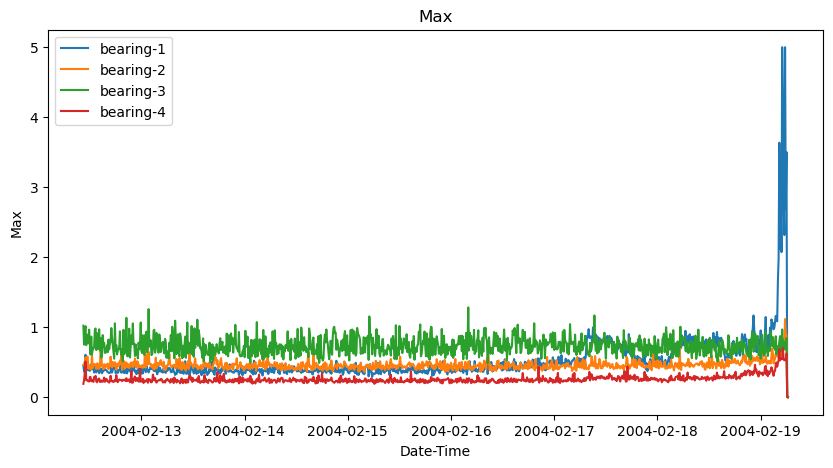

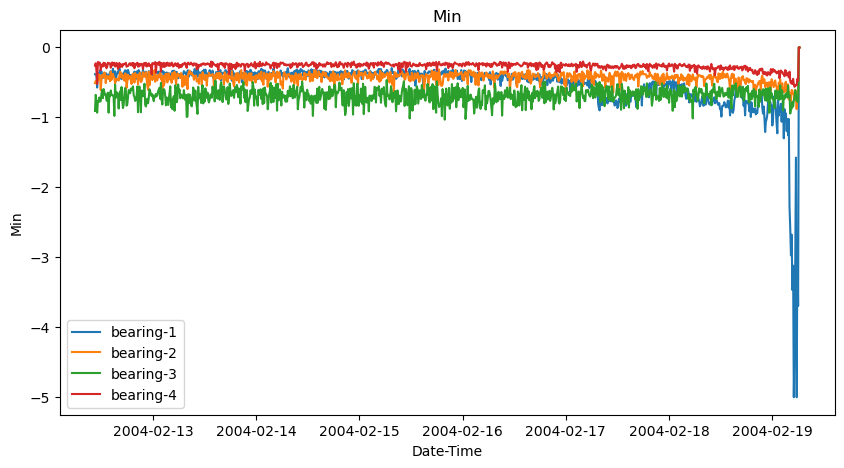

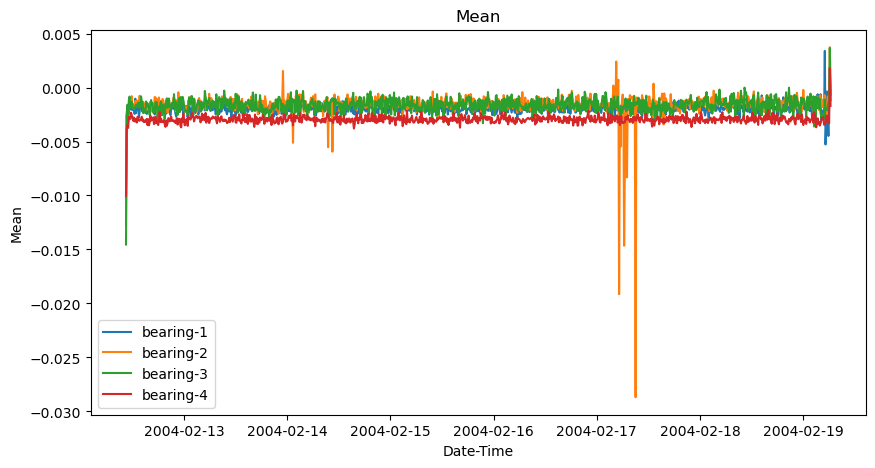

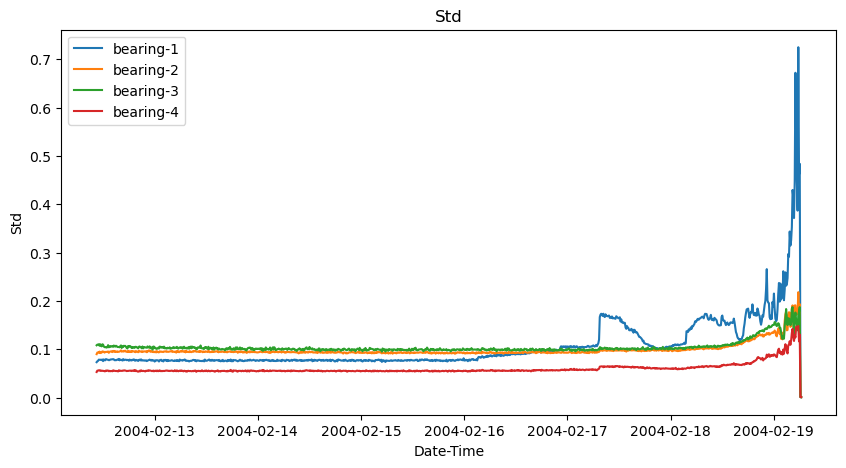

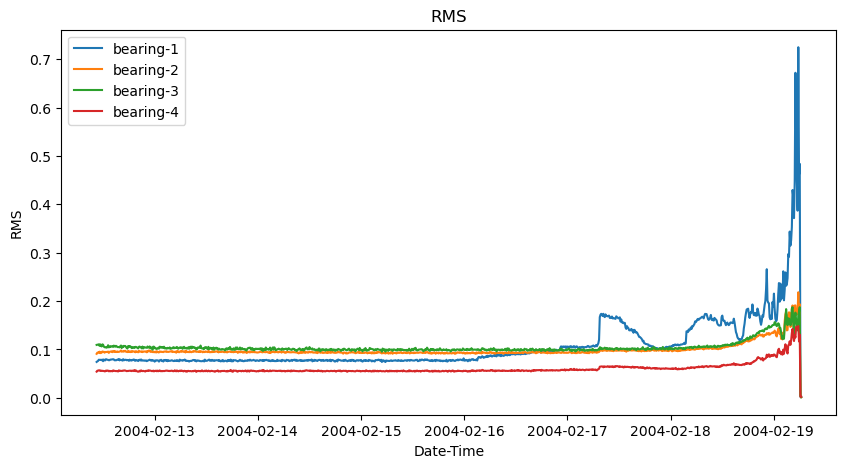

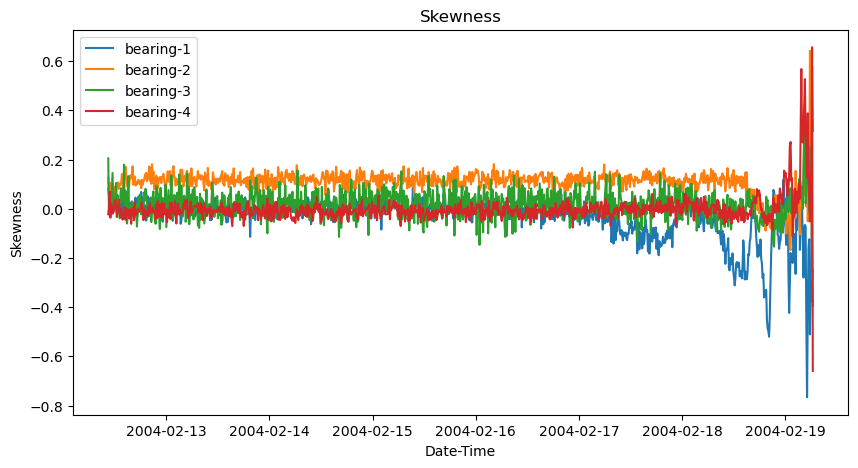

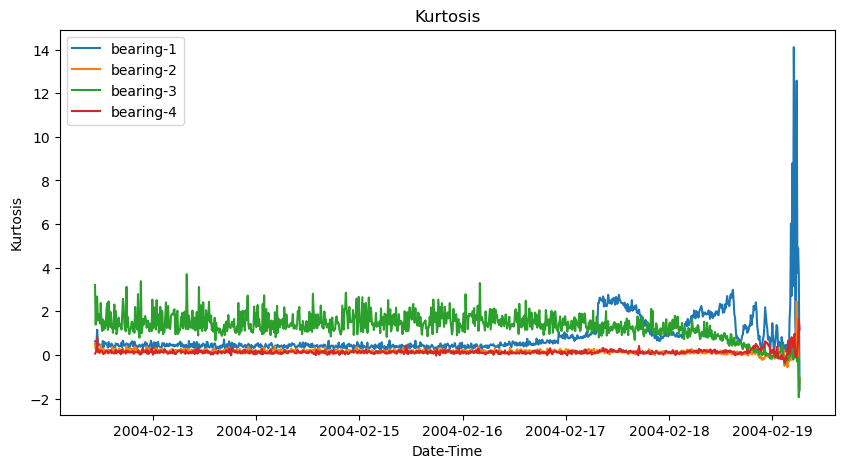

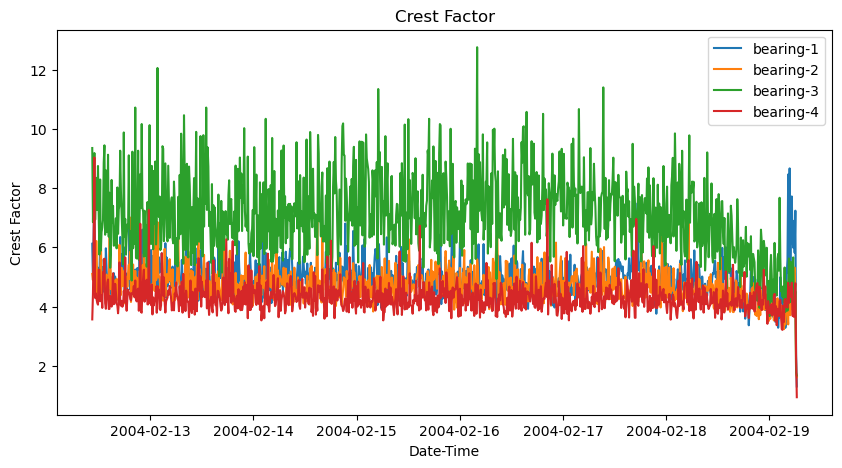

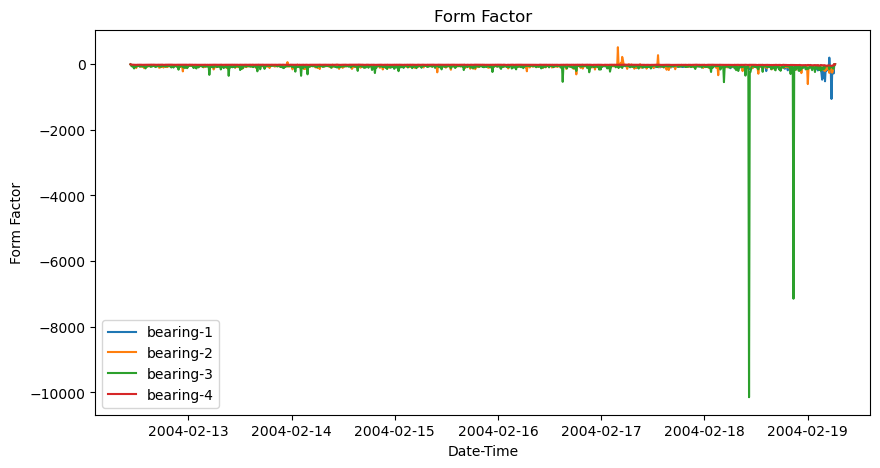

In [28]:
#here we try to plot all the graph of 4 bearing in 1 fig
for col in (df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])#here df1[com] means df1 dataset ka com ka columne
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

In [29]:
#here we know that bearing 1 has fault in reagion '2004-02-18 00:32:00':'2004-02-19 06:22:00'
df=df1['2004-02-18 00:32:00':'2004-02-19 06:22:00']

In [30]:
#so make fault name list
fault=[]
#jitna rows hee utna 'outer race' fault list me add karo
for i in range (0,len(df)):
    fault.append('Outer Race')
#make new colume in df dataframe name 'fault' and assign the fault list values to it
df['Fault']=fault
df   

C:\Users\sujal\AppData\Local\Temp\ipykernel_12108\1392846102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-18 00:32:00,0.481,-0.645,-0.002109,0.108896,0.108914,0.043103,1.006777,4.416327,-51.634520,Outer Race
2004-02-18 00:42:00,0.508,-0.537,-0.002089,0.107409,0.107426,0.026895,0.906887,4.728821,-51.417228,Outer Race
2004-02-18 00:52:00,0.554,-0.540,-0.001542,0.108719,0.108727,0.080662,1.060355,5.095329,-70.501831,Outer Race
2004-02-18 01:02:00,0.591,-0.461,-0.002320,0.110181,0.110203,0.047596,1.030171,5.362826,-47.495934,Outer Race
2004-02-18 01:12:00,0.498,-0.630,-0.002595,0.109821,0.109849,-0.018425,0.916053,4.533508,-42.336963,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,Outer Race
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,Outer Race
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,Outer Race
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,Outer Race


In [31]:

df.to_csv('outer_race_fault.csv',index=False)#now save above df dataframe to csv file 

In [32]:
#similarly choose the range for normal condition 
df=df1['2004-02-14 00:32:00':'2004-02-15 06:22:00']
fault=[]
for i in range (0,len(df)):
    fault.append('Normal')
    
df['Fault']=fault

df.to_csv('Normal.csv',index=False) 

C:\Users\sujal\AppData\Local\Temp\ipykernel_12108\2017024993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault']=fault


In [33]:
df=pd.read_csv('Normal.csv')
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.435,-0.347,-0.001991,0.078193,0.078216,-0.007929,0.403351,5.561507,-39.290363,Normal
1,0.388,-0.342,-0.002211,0.077591,0.077620,0.025307,0.378781,4.998698,-35.109699,Normal
2,0.420,-0.420,-0.001653,0.077155,0.077171,0.026648,0.370972,5.442477,-46.672085,Normal
3,0.386,-0.444,-0.002093,0.077829,0.077855,0.016956,0.504732,4.957911,-37.197670,Normal
4,0.403,-0.308,-0.002283,0.076113,0.076145,0.009797,0.328286,5.292524,-33.349428,Normal
...,...,...,...,...,...,...,...,...,...,...
175,0.293,-0.366,-0.002155,0.073977,0.074007,-0.006562,0.346249,3.959102,-34.338269,Normal
176,0.344,-0.376,-0.001561,0.077223,0.077236,0.016686,0.411773,4.453856,-49.479260,Normal
177,0.339,-0.352,-0.001954,0.076359,0.076382,-0.021013,0.222413,4.438205,-39.088157,Normal
178,0.332,-0.371,-0.002509,0.076533,0.076572,-0.009496,0.367782,4.335790,-30.517329,Normal


In [34]:
# same aapan default cha files banavat aahe hi nanter kamat yeil
df_orf=df1['2004-02-17 12:32:00':'2004-02-19 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_2.csv',index=False)  
df_orf

C:\Users\sujal\AppData\Local\Temp\ipykernel_12108\3318812895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-17 12:32:00,0.789,-0.781,-0.001874,0.162117,0.162124,-0.076375,2.539286,4.866637,-86.515839,Outer Race
2004-02-17 12:42:00,0.803,-0.723,-0.001712,0.155821,0.155826,-0.087399,2.463552,5.153178,-91.001170,Outer Race
2004-02-17 12:52:00,0.879,-0.725,-0.002833,0.156768,0.156790,-0.082349,2.397298,5.606226,-55.341134,Outer Race
2004-02-17 13:02:00,0.784,-0.754,-0.002073,0.154166,0.154177,-0.050836,2.380468,5.085081,-74.391213,Outer Race
2004-02-17 13:12:00,0.854,-0.698,-0.001955,0.155019,0.155028,-0.079743,2.385198,5.508694,-79.314679,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 00:02:00,0.955,-1.118,-0.001586,0.215437,0.215437,-0.080072,1.458276,4.432845,-135.796235,Outer Race
2004-02-19 00:12:00,0.710,-1.021,-0.001834,0.183846,0.183851,-0.146662,0.885198,3.861822,-100.230775,Outer Race
2004-02-19 00:22:00,0.693,-0.728,-0.001688,0.163871,0.163876,0.120602,0.264161,4.228812,-97.072275,Outer Race
2004-02-19 00:32:00,0.647,-0.696,-0.002102,0.158311,0.158321,0.053990,0.326583,4.086625,-75.329810,Outer Race
